In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the MD trajectory

Below we read in the production simulation trajectory using the topology available in the Amber prmtop file:

In [3]:
traj = md.load('BPTI_sim.dcd', top='BPTI_gas.prmtop')
atoms, bonds = traj.topology.to_dataframe()
atoms[:10] # there are many more!

,serial,name,element,resSeq,resName,chainID,segmentID
0,None,N,N,0,ARG,0,
1,None,H,H,0,ARG,0,
2,None,H2,H,0,ARG,0,
3,None,H3,H,0,ARG,0,
4,None,CA,C,0,ARG,0,
5,None,HA,H,0,ARG,0,
6,None,CB,C,0,ARG,0,
7,None,HB2,H,0,ARG,0,
8,None,HB3,H,0,ARG,0,
9,None,CG,C,0,ARG,0,


In [4]:
# find all of the backbone atoms for residues 21-23
print('N atoms for residues 21 to 23 are:')
print(traj.topology.select('resid 21 to 23 and name N'))
print('CA atoms for residues 21 to 23 are:')
print(traj.topology.select('resid 21 to 23 and name CA'))
print('C atoms for residues 21 to 23 are:')
print(traj.topology.select('resid 21 to 23 and name C'))
print('All atoms of residue 22 are:')
print(atoms[369:390])

N atoms for residues 21 to 23 are:
[349 369 390]
CA atoms for residues 21 to 23 are:
[351 371 392]
C atoms for residues 21 to 23 are:
[367 388 402]
All atoms of residue 22 are:
    serial name element  resSeq resName  chainID segmentID
369   None    N       N      22     TYR        0          
370   None    H       H      22     TYR        0          
371   None   CA       C      22     TYR        0          
372   None   HA       H      22     TYR        0          
373   None   CB       C      22     TYR        0          
374   None  HB2       H      22     TYR        0          
375   None  HB3       H      22     TYR        0          
376   None   CG       C      22     TYR        0          
377   None  CD1       C      22     TYR        0          
378   None  HD1       H      22     TYR        0          
379   None  CE1       C      22     TYR        0          
380   None  HE1       H      22     TYR        0          
381   None   CZ       C      22     TYR        0        

## Analyzing the N-C$\alpha$ and N-H bonds

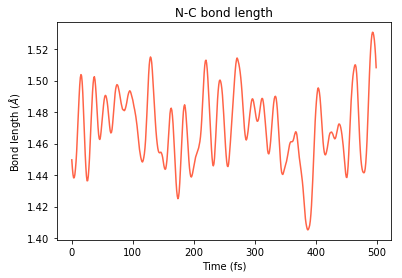

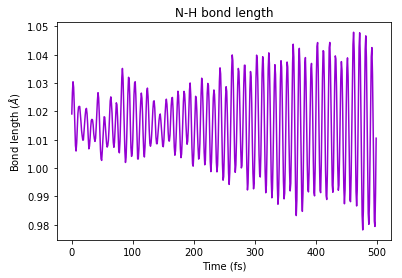

In [9]:
bond_indices = [369, 371]
NClength = md.compute_distances(traj, [bond_indices])

tstart = 5000 # start at step 5000
dt = 500 # plot over 0.5 ps

plt.plot(10*NClength[tstart:tstart+dt], color='Tomato')
plt.title('N-C bond length')
plt.xlabel('Time (fs)')
plt.ylabel(r'Bond length ($\AA$)')
plt.show()

bond_indices = [369, 370]
NHlength = md.compute_distances(traj, [bond_indices])

plt.plot(10*NHlength[tstart:tstart+dt], color='DarkViolet')
plt.title('N-H bond length')
plt.xlabel('Time (fs)')
plt.ylabel(r'Bond length ($\AA$)')
plt.show()

## Analyzing the N-C$\alpha$-C bond angle

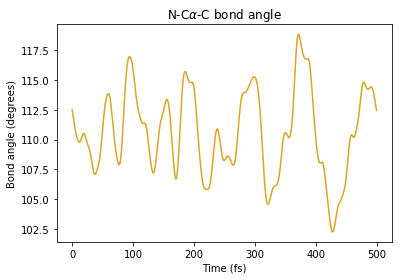

In [6]:
angle_indices = [369, 371, 388]
bondangle = md.compute_angles(traj, [angle_indices])

plt.plot((180/np.pi)*bondangle[tstart:tstart+dt], color='Goldenrod')
plt.title(r'N-C$\alpha$-C bond angle')
plt.xlabel('Time (fs)')
plt.ylabel('Bond angle (degrees)')
plt.show()

## Analyzing the backbone torsions ($\phi$,$\psi$, $\omega$)

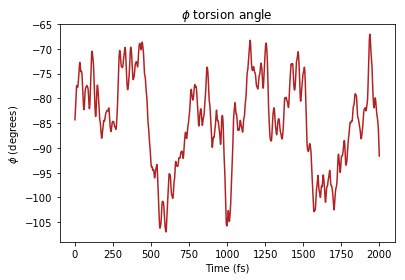

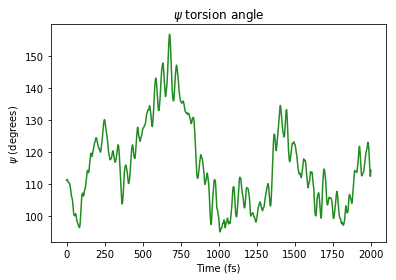

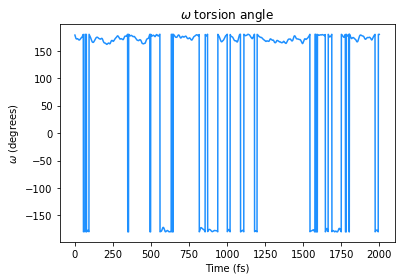

In [10]:
phi_ind = [367,369,371,388] # define phi22
psi_ind = [369,371,388,390] # define psi22
omega_ind = [351,367,369,371] # define omega22
torsions = md.compute_dihedrals(traj, [phi_ind, psi_ind, omega_ind])
torsionsd = (180/np.pi)*torsions # convert torsions to degrees!

dt = 2000 # plot over 2.0 ps

plt.plot(torsionsd[tstart:tstart+dt,0], color='FireBrick')
plt.title(r'$\phi$ torsion angle')
plt.xlabel('Time (fs)')
plt.ylabel(r'$\phi$ (degrees)')
plt.show()

plt.plot(torsionsd[tstart:tstart+dt,1], color='ForestGreen')
plt.title(r'$\psi$ torsion angle')
plt.xlabel('Time (fs)')
plt.ylabel(r'$\psi$ (degrees)')
plt.show()

plt.plot(torsionsd[tstart:tstart+dt,2], color='DodgerBlue')
plt.title(r'$\omega$ torsion angle')
plt.xlabel('Time (fs)')
plt.ylabel(r'$\omega$ (degrees)')
plt.show()

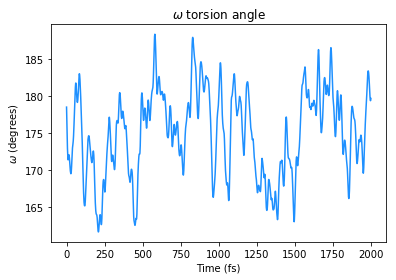

In [11]:
# well that last graph looks kind of wacky...
# let's fix it up by changing the limits from (-180°,180°) to (0°,360°)
omegad = torsionsd[:,2]
omegad[omegad < 0] = 360 + omegad[omegad < 0]

plt.plot(omegad[tstart:tstart+dt], color='DodgerBlue')
plt.title(r'$\omega$ torsion angle')
plt.xlabel('Time (fs)')
plt.ylabel(r'$\omega$ (degrees)')
plt.show()